In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [101]:
def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

files = ['flag.jpg','flower like.jpg','architecture.jpg']

img = cv2.cvtColor(cv2.imread(files[2]), cv2.COLOR_BGR2RGB)
img.shape


(4032, 3024, 3)

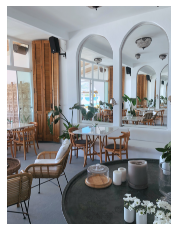

In [102]:
show(img)

In [103]:
r,g,b = cv2.split(img/255)

In [104]:
pca_components = 250

pca_r = PCA(pca_components)
pca_r.fit(r)
reduced_r = pca_r.transform(r)

pca_g = PCA(pca_components)
pca_g.fit(g)
reduced_g = pca_g.transform(g)

pca_b = PCA(pca_components)
pca_b.fit(b)
reduced_b = pca_b.transform(b)

combined = np.array([reduced_r, reduced_g, reduced_b])
print(combined.shape)


(3, 4032, 250)


In [105]:
combined = combined.reshape(img.shape[0], pca_components, 3)


In [106]:
def inverse_transform(X,pca):
    return np.dot(X, pca.components_) + pca.mean_

recon_r = inverse_transform(reduced_r,pca_r).astype(float)
recon_g = inverse_transform(reduced_g,pca_g).astype(float)
recon_b = inverse_transform(reduced_b,pca_b).astype(float)

reconstructed = (cv2.merge((recon_r, recon_g, recon_b)))
reconstructed.shape

(4032, 3024, 3)

In [107]:
# show(reconstructed)
reconstructed.max()


1.0938863230538072

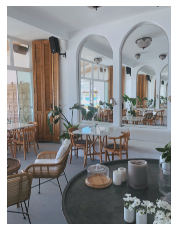

In [108]:
reconstructed_ = (reconstructed - reconstructed.min()) / (reconstructed.max() - reconstructed.min())
reconstructed_ = reconstructed_ * 255
show(reconstructed_.astype(int))
# reconstructed_


In [110]:
print(pca_r.components_.shape)
print(pca_r.mean_.shape)


(250, 3024)
(3024,)
